In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


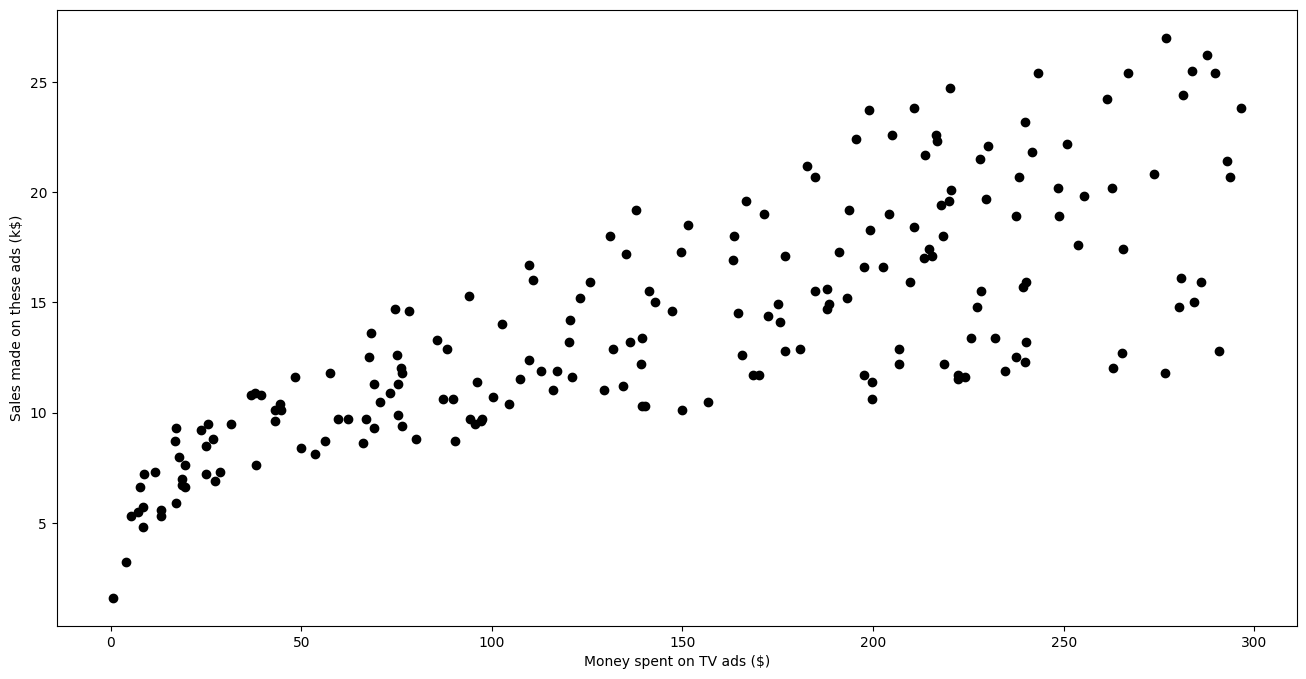

In [3]:
plt.figure(figsize=(16,8))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales made on these ads (k$)')
plt.show()

In [4]:
Xs = data.drop(['sales'], axis=1)
Y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs,Y)
print(f'Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*Radio + {reg.coef_[0][2]}*Newspaper')

Y = 2.938889369459412 + 0.0457646454553976*TV + 0.18853001691820445*Radio + -0.0010374930424763285*Newspaper


In [5]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
Y = data['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
ols = sm.OLS(Y, exog) # ordinary least squares
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        23:17:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0